<a href="https://colab.research.google.com/github/sowmR/ML-LogisticRegression/blob/main/fraudDetection/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

option1: Use the steps in https://www.kaggle.com/general/74235 to connect to Kaggle dataset api
option2: Download the dataset csv file from https://www.kaggle.com/mlg-ulb/creditcardfraud. use the following code to load the dataset to the application. 

In [1]:
# use the following code to upload the creditcard.csv file
from google.colab import files

files.upload()

Saving creditcard.csv to creditcard.csv


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection  import train_test_split
from sklearn import metrics as MTR
from sklearn.linear_model import LogisticRegression


In [30]:
data_df = pd.read_csv('/content/creditcard.csv')

Here, the important columns are Amount, Time, Class
Class = 0 (not fraud transactio) / 1 (fraud transaction)


In [29]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


Check if there is any missing value in the dataset
The Following code check if there is any empty values in any of the columns.

In [32]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Calculate the percentage of total number of not fraud transaction

In [33]:
notFraudTransactions = data_df[data_df['Class'].isin([0])]
print("Number of fraud transaction: ",len(notFraudTransactions.index))
print ("Percentage of not fraud transaction: ", len(notFraudTransactions.index)/len(data_df.index) * 100)
fraudTransactions = data_df[data_df['Class'].isin([1])]
print("Number of fraud transaction: ",len(fraudTransactions.index))
print ("Percentage of fraud transaction: ", len(fraudTransactions.index)/len(data_df.index) * 100)

Number of fraud transaction:  284315
Percentage of not fraud transaction:  99.82725143693798
Number of fraud transaction:  492
Percentage of fraud transaction:  0.1727485630620034


Now lets plot some relationship plot

Text(0.5, 1.0, 'Time vs Amount')

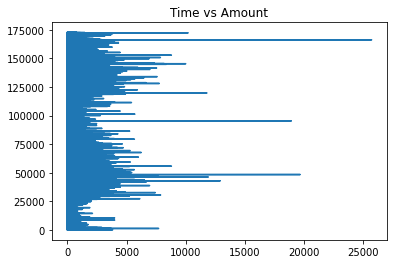

In [20]:
x = list(data_df["Amount"])
y=list(data_df["Time"])
plt.plot(x,y)
plt.title('Time vs Amount')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


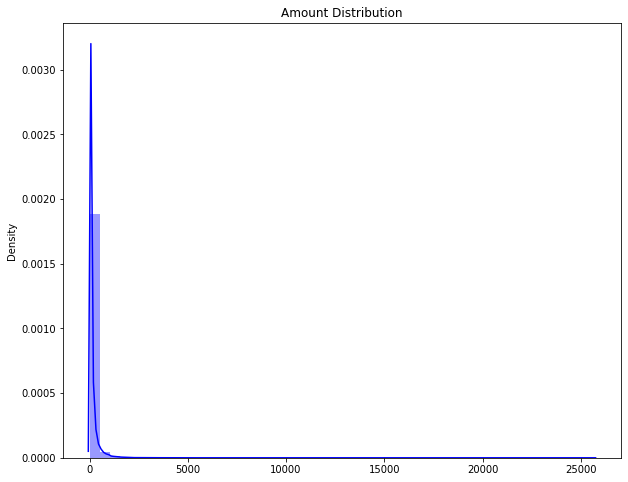

In [34]:
plt.figure(figsize=(10,8))
plt.title("Amount Distribution")
sns.distplot(x,color='blue')

From the above chart, we see that number of transaction with high amount is low. So There is a high probablity for huge transaction can be fraud


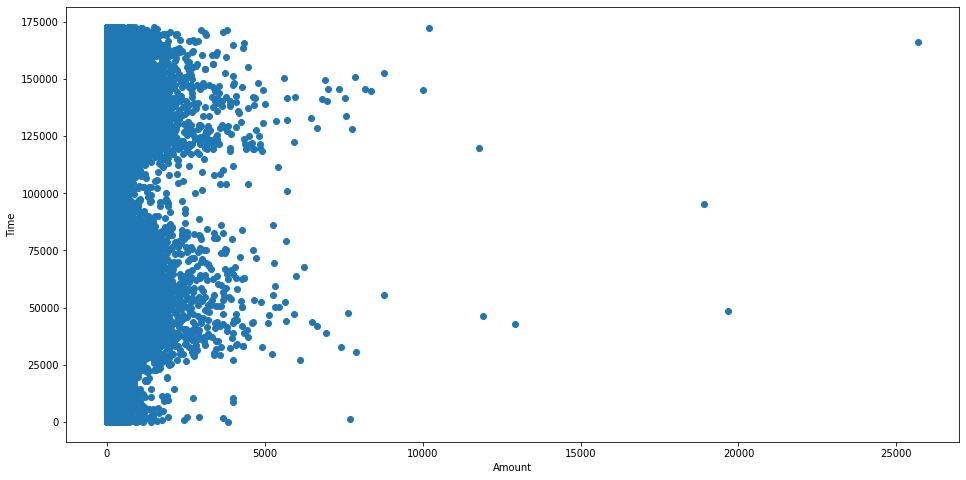

In [35]:
# outlier analysis
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x,y)
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

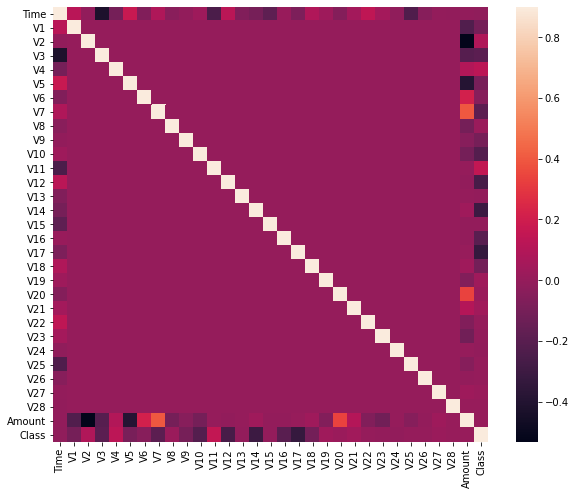

In [36]:
# correlation matrix
corr_df = data_df.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_df,vmax=.9, square=True)
plt.show()

In [43]:
features= data_df.drop(['Class'], axis=1)
Target = data_df['Class']
Xtrain1,  Xtest,yTrain1, yTest = train_test_split(features,Target, test_size=0.2, random_state=42)

print(Xtrain1.shape)
print(yTrain1.shape)
Xtrain, Xval, yTrain, yVal = train_test_split(Xtrain1,yTrain1, test_size=0.2, random_state=23)

(227845, 30)
(227845,)


In [44]:
model = LogisticRegression()
model.fit(Xtrain, yTrain)
pred = model.predict(Xval)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
acc = MTR.accuracy_score(yVal,pred)
print(acc)

0.9988369286137506


In [47]:
# confusion metricx
cm = MTR.confusion_matrix(yVal,pred)
print(cm)

[[45457    30]
 [   23    59]]
